## 数据读取测试

In [2]:
import glob
import os
import pandas as pd

In [6]:
with open('/home/sharing/disk3/Datasets/TCM-Datasets/多模态数据/问诊/answer.csv', 'r', encoding='gbk') as f:
    labels = pd.read_csv(f)
labels

,sample_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,27792,female,147,55,36--45岁,无,1.356435e+10,A,A,C,C,A,B,A,B,A,A,A,D,A
1,27800,male,173,76,36--45岁,无,1.350533e+10,A,C,B,A,C,A,B,B,A,B,A,C,A
2,27799,male,170,75,46--60岁,无,1.396431e+10,A,D,B,"B,A",D,B,A,"B,C",A,B,B,D,A
3,27815,male,164,66,60--80岁,高血压|胃炎|类风湿关节炎|糖尿病,1.891671e+10,A,D,C,C,D,B,A,C,B,A,A,D,B
4,27816,female,155,42,60--80岁,甲减,1.831709e+10,A,A,C,B,C,B,B,E,B,B,B,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,27766,female,155,57,46--60岁,甲减,1.340715e+10,B,C,A,D,D,B,A,B,A,B,A,D,B
8733,27768,male,161,58,60--80岁,肝炎（慢性乙肝）|甲减|支气管炎,1.367177e+10,A,D,B,A,D,B,A,A,B,B,B,D,A
8734,27772,male,170,76,60--80岁,无,1.317657e+10,A,C,C,C,D,B,B,B,B,A,B,D,A
8735,27776,female,158,58,36--45岁,无,1.595333e+10,A,A,C,D,"A,B",B,B,B,B,A,B,D,A


In [7]:
len(labels)

8737

In [8]:
import cv2
img = cv2.imread('/home/sharing/disk3/Datasets/TCM-Datasets/多模态数据/面诊/raw/27772.jpg')
img.shape

(1280, 720, 3)

## 面部分割测试

In [1]:
from torchvision import transforms
from PIL import Image
from torchvision.transforms import functional as TF
import torch

img = Image.open('/home/sharing/disk3/Datasets/TCM-Datasets/多模态数据/面诊/raw/27777.jpg')
transform = transforms.ToTensor()
aug = transform(img)


In [11]:
from features.face.AreaSeg import AreaSeg
from data.dataset.features import faceDataset
from torch.utils.data import DataLoader
import math

# path = '/home/sharing/disk3/Datasets/TCM-Datasets/多模态数据'
# dataset = faceDataset(path)

model = AreaSeg(gpu_device_id=1)
from PIL import Image, ImageOps

# img = Image.open('/home/sharing/disk3/Datasets/TCM-Datasets/多模态数据/面诊/raw/27777.jpg')
# img = Image.open('./test_data/img_face_2603.jpg')
img = Image.open('./test_data/img_face_2657.jpg')

# img = Image.open('test_data/5849.jpg')
# img = ImageOps.exif_transpose(img)

# img = Image.open('参考/面部语义分割/data/imgs/0.png')
scale = 0.75
w, h = img.size
newW, newH = int(scale * w), int(scale * h)
img = img.resize((newW, newH))

# img = Image.open('test_data/20210702141338.png')
# img.load()
# background = Image.new("RGB", img.size, (255, 255, 255))
# background.paste(img, mask=img.split()[3])
# background.save('test_data/foo.jpg', 'JPEG', quality=80)

# img = Image.open('test_data/foo.jpg')

width, height = img.size
print(img.size)
width = math.ceil(width / 16) * 16
height = math.ceil(height / 16) * 16
img = img.resize((width,height))
print(img.size)
# img = img.resize((768,1024))



(346, 481)
(352, 496)


In [12]:
output = model.do_test(img)
output.shape

(496, 352)

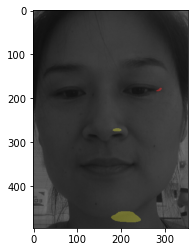

In [16]:
import numpy as np
import imgviz
from matplotlib.pyplot import imshow

out_img = imgviz.label2rgb(label=output, img=imgviz.asgray(np.array(img)))
imshow(np.asarray(out_img))

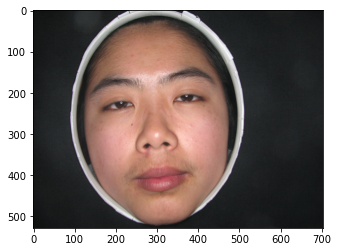

In [7]:
imshow(np.asarray(img))

In [3]:
from torchsummary import summary
from features.face.AreaSeg import NestedUNet

net = NestedUNet(num_classes=15).to('cuda')

summary(net, (3, 512, 512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 512, 512]             896
       BatchNorm2d-2         [-1, 32, 512, 512]              64
              ReLU-3         [-1, 32, 512, 512]               0
            Conv2d-4         [-1, 32, 512, 512]           9,248
       BatchNorm2d-5         [-1, 32, 512, 512]              64
              ReLU-6         [-1, 32, 512, 512]               0
          VGGBlock-7         [-1, 32, 512, 512]               0
         MaxPool2d-8         [-1, 32, 256, 256]               0
            Conv2d-9         [-1, 64, 256, 256]          18,496
      BatchNorm2d-10         [-1, 64, 256, 256]             128
             ReLU-11         [-1, 64, 256, 256]               0
           Conv2d-12         [-1, 64, 256, 256]          36,928
      BatchNorm2d-13         [-1, 64, 256, 256]             128
             ReLU-14         [-1, 64, 2

## 舌上测试

### 舌体分割

In [1]:
from features.tongueTop import tongueColor, tongueSeg
import numpy as np
from PIL import Image

model = tongueSeg()
# img = Image.open("test_data/tongueTop_21007.jpg")
# img = Image.open("test_data/tongueTop_21014.jpg")
img = Image.open("test_data/tongueTop_21015.jpg")
# img = Image.open("test_data/tongueTop_15470.png")
# img = Image.open("result.jpg")

img.size


(673, 397)

(397, 673)


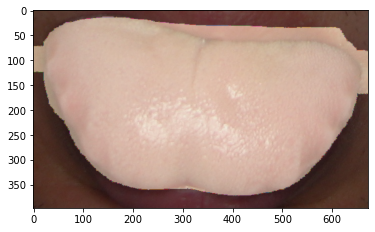

In [2]:
import imgviz
from matplotlib.pyplot import imshow

out = model.get(img)
print(out['imageData'].shape)
out_img = imgviz.label2rgb(label=out["imageData"], img=np.asarray(img))
imshow(np.asarray(out_img))
# imshow(np.asarray(out["imageData"]))

In [27]:
(out["imageData"] == 255).sum()

187532

In [19]:
from facenet_pytorch import MTCNN

def getFace(image, output_size = 512, path = 'result.jpg'):
    mtcnn = MTCNN(image_size=output_size)
    return mtcnn(image, save_path=path)

In [20]:
getFace(img)

tensor([[[ 0.5898,  0.6133,  0.6211,  ...,  0.6992,  0.6992,  0.6836],
         [ 0.5820,  0.6055,  0.6211,  ...,  0.6914,  0.6992,  0.6992],
         [ 0.6133,  0.6133,  0.6133,  ...,  0.6758,  0.6914,  0.6992],
         ...,
         [-0.0820, -0.0586, -0.0508,  ...,  0.0664,  0.0508,  0.0508],
         [-0.0820, -0.0586, -0.0508,  ...,  0.0508,  0.0352,  0.0508],
         [-0.0430, -0.0508, -0.0430,  ...,  0.0664,  0.0273,  0.0273]],

        [[ 0.7773,  0.7773,  0.7852,  ...,  0.8477,  0.8477,  0.8242],
         [ 0.7617,  0.7852,  0.7930,  ...,  0.8320,  0.8320,  0.8320],
         [ 0.7617,  0.7617,  0.7695,  ...,  0.8242,  0.8320,  0.8398],
         ...,
         [ 0.1055,  0.1367,  0.1289,  ...,  0.2148,  0.1992,  0.1836],
         [ 0.1211,  0.1445,  0.1367,  ...,  0.2148,  0.1992,  0.1836],
         [ 0.1445,  0.1523,  0.1445,  ...,  0.2305,  0.1914,  0.1680]],

        [[ 0.8086,  0.8164,  0.8242,  ...,  0.9648,  0.9727,  0.9805],
         [ 0.7852,  0.8164,  0.8320,  ...,  0

### 舌苔舌质分离

In [5]:
from features.tongueTop import tongueColor
import numpy as np
from PIL import Image

model = tongueColor()
# img = Image.open("test_data/tongueTop_21007.jpg")
# img = np.asarray(img)
img = res
# h,w,c = img.shape
# vec = np.reshape(img,(h*w,3))
out = model.cluster(img)

In [13]:
(out[1] > 0).sum()

61699

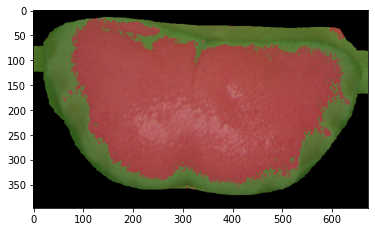

In [12]:
import imgviz
from matplotlib.pyplot import imshow

# res =  np.concatenate((np.expand_dims(out[0], 0), np.expand_dims(out[1], 0)), axis=0).astype('uint8')
out0 = np.true_divide(out[0], 255)
out1 = np.true_divide(out[1], 255) * 2
out0 = out0.astype('uint8')
out1 = out1.astype('uint8')
out_f = out0 + out1
out_img = imgviz.label2rgb(label=out_f, img=np.asarray(img))
imshow(np.asarray(out_img))

In [10]:
out_f.max()

255

In [3]:
def getImageFromMask(raw_img, msk):
    msk = msk > 200
    res = np.zeros(raw_img.shape)
    for i in range(3):
        res[:,:,i] = msk * raw_img[:,:,i]
    res = res.astype('uint8')
    return res

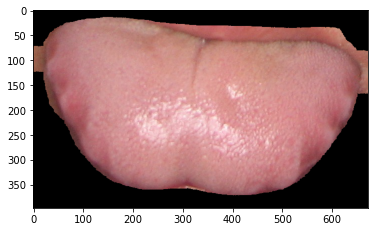

In [4]:
res = getImageFromMask(np.asarray(img), out["imageData"])
imshow(np.asarray(res))

In [15]:
im1 = Image.fromarray(res)
im1 = im1.save("./test_data/tongueTop_seg.jpg")

## 脉诊血液动力学测试

{'avg_period': array([-2.62056557e-03, -1.78251727e-03,  1.11988510e-03,  9.04968620e-03,
        1.97730737e-02,  3.57882887e-02,  5.48060804e-02,  7.94370527e-02,
        1.06383594e-01,  1.37506719e-01,  1.69523975e-01,  2.04664665e-01,
        2.39290406e-01,  2.75411834e-01,  3.09894644e-01,  3.45231332e-01,
        3.78039195e-01,  4.10518370e-01,  4.39774969e-01,  4.68557001e-01,
        4.93898892e-01,  5.18401611e-01,  5.39393002e-01,  5.59751363e-01,
        5.76294425e-01,  5.91568789e-01,  6.02467385e-01,  6.12045794e-01,
        6.17009926e-01,  6.20581826e-01,  6.19756025e-01,  6.18313389e-01,
        6.12939299e-01,  6.07389148e-01,  5.98495182e-01,  5.90481507e-01,
        5.79926647e-01,  5.70969855e-01,  5.60227893e-01,  5.51943774e-01,
        5.42097695e-01,  5.34496994e-01,  5.25139551e-01,  5.18071692e-01,
        5.08938929e-01,  5.01658992e-01,  4.92339759e-01,  4.85296221e-01,
        4.76213190e-01,  4.69060252e-01,  4.56765300e-01,  4.48720065e-01,
        4.

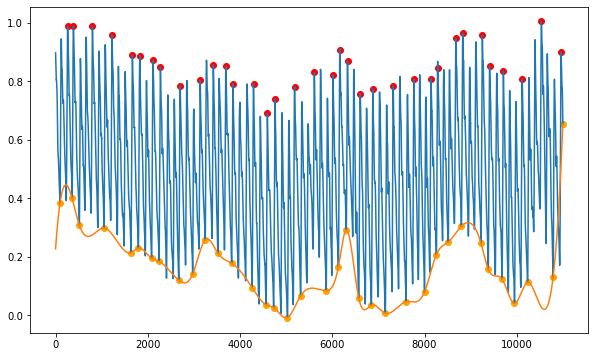

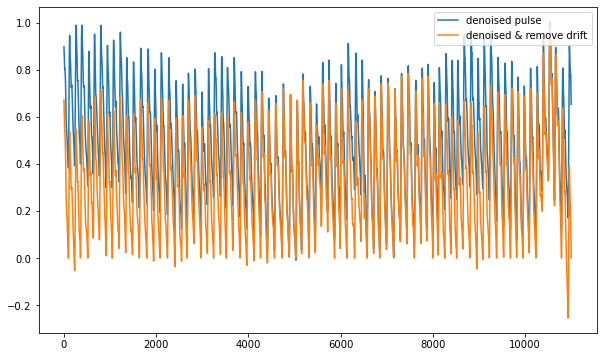

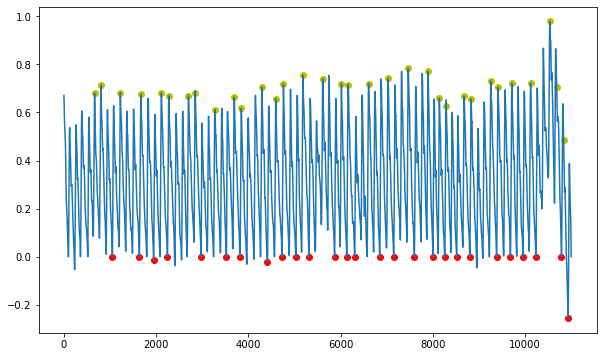

In [10]:
from features.pulse import hemodynamics

hemo = hemodynamics()
res = hemo.get('test_data/pulse_1.txt')
print(res)

In [11]:
len(res["period_feature"])

6

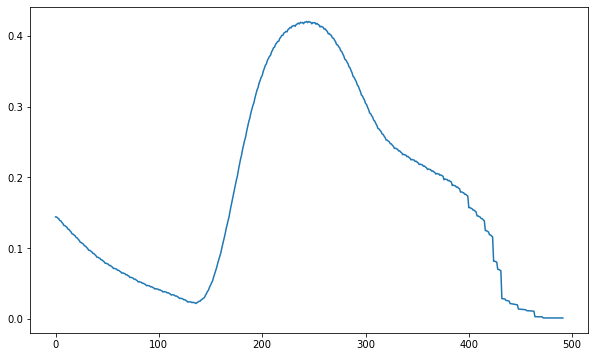

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(res["hemodynamics"]["avg_period"])


{'hemodynamics': {'avg_period': [0.1440569645836106,
   0.14393131594309233,
   0.14257260955291173,
   0.1415974441898957,
   0.13903601173308916,
   0.13855689824839634,
   0.1365218219007532,
   0.13488095996990004,
   0.1320463512821329,
   0.13178228398924804,
   0.1304157358571755,
   0.12939278361260348,
   0.1268527281759564,
   0.12636401371336609,
   0.12437257162777654,
   0.12276921265574894,
   0.12000228120738858,
   0.1197363842501903,
   0.11832825672569298,
   0.11730411353754841,
   0.11479478908291241,
   0.11428625074984852,
   0.11231721769369016,
   0.11073398263324753,
   0.10803551404642155,
   0.10780012860589357,
   0.10647496758978782,
   0.10554017989218749,
   0.10317524940542001,
   0.10277635975098012,
   0.10096307393032998,
   0.099528023253722,
   0.0970103702081122,
   0.09690003722898033,
   0.09572717472153973,
   0.09492886534722,
   0.09273129697918252,
   0.09245043550896895,
   0.09078852494833593,
   0.0894946068261021,
   0.08714781988463917,


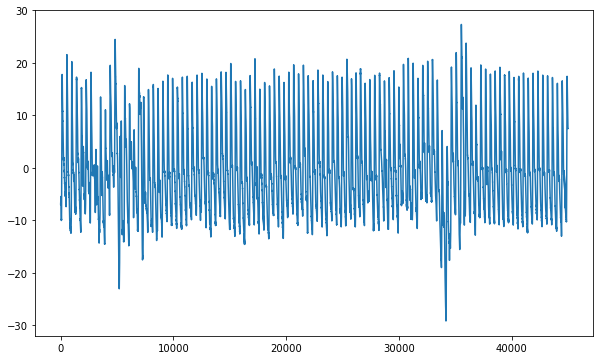

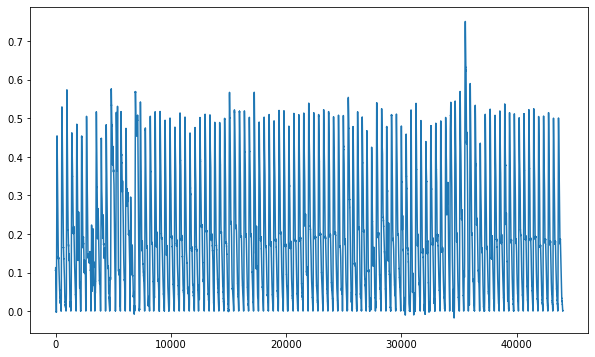

In [11]:
from features.pulse import pulseFeature

p = pulseFeature()
# res = p.doSingle('/home/sharing/disk3/Datasets/TCM-Datasets/陕西藏族汉族脉诊数据/脉诊/raw/20180911001.txt', 'tmp', METHODS=['hemodynamics'])
res = p.doSingle('./test_data/pulse_2.txt', 'tmp', METHODS=['hemodynamics'])
res
# p.doDataset('/home/sharing/disk3/Datasets/TCM-Datasets/陕西藏族汉族脉诊数据/脉诊/raw')